In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [3]:
df = pd.read_csv('Wildland_Fire_Incident_Locations.csv')

/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_14553/3642120065.py:1: DtypeWarning: Columns (7,8,17,35,64,67,88,89,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Wildland_Fire_Incident_Locations.csv')


In [59]:
url = "https://etweather.tamu.edu/rainhistory/"
headers = headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
req = requests.get(url, headers= headers).text
soup = BeautifulSoup(req,'html.parser')


In [62]:
table = soup.find_all("table")[0]
rows = table.find_all('tr')[1:]
years = []
rainfall = []
for row in rows[:7]:
    years.append(int(row.find_all("td")[0].text))
    rainfall.append(float(row.find_all("td")[-1].text))

In [65]:
rain_TX = pd.DataFrame(zip(years,rainfall), columns=['Year', 'Rainfall'])
rain_TX

,Year,Rainfall
0,2021,46.81
1,2020,52.60
2,2019,45.93
3,2018,58.65
4,2017,48.69
5,2016,56.68
6,2015,77.37


In [68]:
columns = list(df.columns)
redcols = []
for i in columns:
    m = df[i].isna().sum()
    #print(i, '                ', m)
    if m >0.5*df.shape[0]:
        redcols.append(i)

In [69]:
df.drop(columns = redcols, inplace=True)
df.columns

Index(['X', 'Y', 'OBJECTID', 'SourceOID', 'ADSPermissionState',
       'ContainmentDateTime', 'ControlDateTime', 'CreatedBySystem',
       'IncidentSize', 'DiscoveryAcres', 'DispatchCenterID', 'FireCause',
       'FireCode', 'FireDiscoveryDateTime', 'FireOutDateTime', 'GACC',
       'IncidentName', 'IncidentTypeCategory', 'IncidentTypeKind',
       'InitialLatitude', 'InitialLongitude', 'IrwinID', 'IsFireCodeRequested',
       'IsFSAssisted', 'IsMultiJurisdictional', 'IsReimbursable', 'IsTrespass',
       'LocalIncidentIdentifier', 'POOCounty', 'POODispatchCenterID',
       'POOFips', 'POOJurisdictionalUnit', 'POOLandownerCategory',
       'POOLandownerKind', 'POOPredictiveServiceAreaID', 'POOProtectingAgency',
       'POOProtectingUnit', 'POOState', 'UniqueFireIdentifier',
       'WFDSSDecisionStatus', 'CreatedOnDateTime_dt', 'ModifiedOnDateTime_dt',
       'IsCpxChild', 'SourceGlobalID', 'GlobalID'],
      dtype='object')

In [126]:
df_TX = df[df.POOState == 'US-TX']
df_TX['FireDiscoveryDateTime'] = pd.to_datetime(df_TX['FireDiscoveryDateTime'])
df_TX['FireYear'] = pd.DatetimeIndex(df_TX.FireDiscoveryDateTime).year
df_TX['FireMonth'] = pd.DatetimeIndex(df_TX.FireDiscoveryDateTime).month
df_TX = df_TX[df_TX.FireYear>=2015]

/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_14553/720065638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TX['FireDiscoveryDateTime'] = pd.to_datetime(df_TX['FireDiscoveryDateTime'])
/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_14553/720065638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TX['FireYear'] = pd.DatetimeIndex(df_TX.FireDiscoveryDateTime).year
/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_14553/720065638.py:4: SettingWithCopyWarning: 
A

In [89]:
AreaBurned = df_TX.groupby('FireYear').sum().IncidentSize.values[:-2]
AreaBurned = AreaBurned[::-1]
AreaBurned

array([183371.985, 338940.58 , 157860.24 , 423590.41 , 644969.57 ,
       174027.64 , 129505.15 ])

In [84]:
df_TX.groupby('FireYear').sum().IncidentSize

FireYear
2015    129505.150
2016    174027.640
2017    644969.570
2018    423590.410
2019    157860.240
2020    338940.580
2021    183371.985
2022    737767.200
2023     39849.250
Name: IncidentSize, dtype: float64

In [104]:
rain_TX['AreaBurned'] = AreaBurned
rain_TX['Rainfall'] = (rain_TX.Rainfall-47.06)

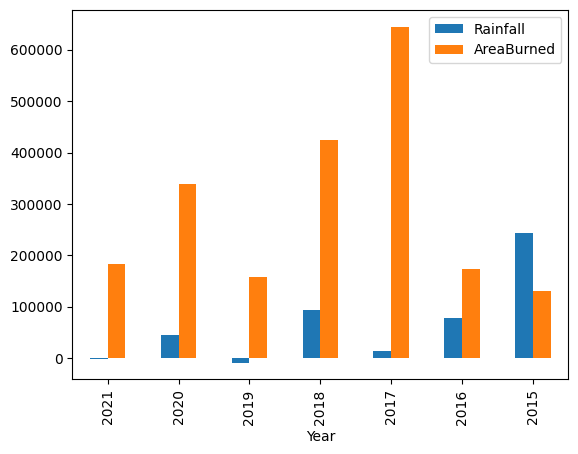

In [125]:
fig = plt.figure()
ax = fig.subplots()
rain_TX.plot.bar(x='Year', y = ['Rainfall', 'AreaBurned'], ax = ax)
ax.set_yticks = False
fig.savefig('Rain_vs_Burn.png')

In [117]:
rain_TX['Rainfall'] *= 4

<AxesSubplot: xlabel='Year', ylabel='Rainfall'>

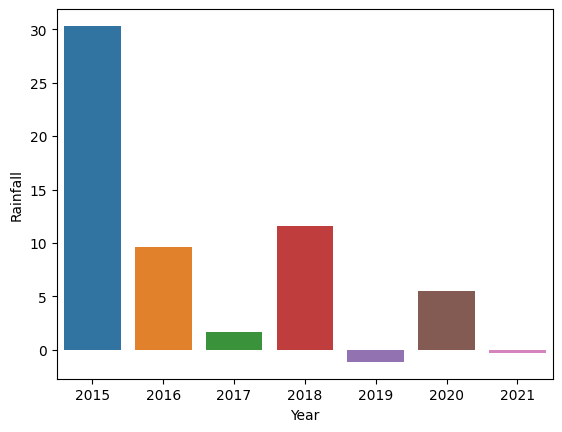

In [109]:
sns.barplot(data = rain_TX, y =  'Rainfall', x = 'Year')

In [129]:
df_TX.FireMonth.value_counts()

8     1225
7     1049
3     1041
10     922
1      793
2      776
9      724
6      538
4      491
11     416
12     341
5      325
Name: FireMonth, dtype: int64